# **IMPORTING DEPENDENCIES**

In [ ]:
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [ ]:
df = pd.read_csv("/content/HealthcareProviders.csv")

# **BASIC EXPLORATION OF THE DATASET**

In [ ]:
df.describe(include='all')

,index,National Provider Identifier,Last Name/Organization Name of the Provider,First Name of the Provider,Middle Initial of the Provider,Credentials of the Provider,Gender of the Provider,Entity Type of the Provider,Street Address 1 of the Provider,Street Address 2 of the Provider,...,HCPCS Code,HCPCS Description,HCPCS Drug Indicator,Number of Services,Number of Medicare Beneficiaries,Number of Distinct Medicare Beneficiary/Per Day Services,Average Medicare Allowed Amount,Average Submitted Charge Amount,Average Medicare Payment Amount,Average Medicare Standardized Amount
count,1.000000e+05,1.000000e+05,100000,95745,70669,92791,95746,100000,100000,40637,...,100000,100000,100000,100000,100000,100000,100000,100000,100000,100000
unique,NaN,NaN,42820,13022,29,1854,2,2,51928,10024,...,2631,2455,2,2748,1274,1979,49629,38088,83367,76237
top,NaN,NaN,PATEL,MICHAEL,A,MD,M,I,200 1ST ST SW,SUITE 200,...,99213,Established patient office or other outpatient...,N,13,11,12,3,150,2.94,25.32
freq,NaN,NaN,557,2350,8152,32874,66641,95746,244,1624,...,4578,4578,93802,3018,4791,3210,1017,970,623,1630
mean,4.907646e+06,1.498227e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,2.839633e+06,2.874125e+08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,2.090000e+02,1.003001e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,2.458791e+06,1.245669e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,4.901266e+06,1.497847e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,7.349450e+06,1.740374e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


** ADDING A NEW COLUMN "MONEY DIFFERENCE" IN THE DATASET WHICH CALCULATES THE DIFFERENCE BETWEEN "AVERAGE SUBMITTED CHARGE AMOUNT" COLUMN AND THE "AVERAGE MEDICARE PAYMENT AMOUNT" COLUMN**

In [ ]:
df["Average Submitted Charge Amount"] = df["Average Submitted Charge Amount"].replace(',', '', regex=True)

In [ ]:
df["Average Medicare Payment Amount"] = df["Average Medicare Payment Amount"].replace(',', '', regex=True)

In [ ]:
df["Money difference"] = df["Average Submitted Charge Amount"].astype(float) - df["Average Medicare Payment Amount"].astype(float)

# **Basic exploration of the dataset with the new column**

In [ ]:
df.nunique()

index                                                       100000
National Provider Identifier                                 89508
Last Name/Organization Name of the Provider                  42820
First Name of the Provider                                   13022
Middle Initial of the Provider                                  29
Credentials of the Provider                                   1854
Gender of the Provider                                           2
Entity Type of the Provider                                      2
Street Address 1 of the Provider                             51928
Street Address 2 of the Provider                             10024
City of the Provider                                          5846
Zip Code of the Provider                                     47827
State Code of the Provider                                      58
Country Code of the Provider                                     4
Provider Type                                                 

In [ ]:
(df.isnull().sum()/(len(df)))*100

index                                                        0.000
National Provider Identifier                                 0.000
Last Name/Organization Name of the Provider                  0.000
First Name of the Provider                                   4.255
Middle Initial of the Provider                              29.331
Credentials of the Provider                                  7.209
Gender of the Provider                                       4.254
Entity Type of the Provider                                  0.000
Street Address 1 of the Provider                             0.000
Street Address 2 of the Provider                            59.363
City of the Provider                                         0.000
Zip Code of the Provider                                     0.000
State Code of the Provider                                   0.000
Country Code of the Provider                                 0.000
Provider Type                                                0

In [ ]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
index,100000.0,NaN,NaN,NaN,4907645.74603,2839632.695465,209.0,2458790.75,4901266.0,7349450.5,9847440.0
National Provider Identifier,100000.0,NaN,NaN,NaN,1498226858.04662,287412506.095332,1003001298.0,1245669407.25,1497846612.0,1740373949.25,1992999874.0
Last Name/Organization Name of the Provider,100000,42820,PATEL,557,NaN,NaN,NaN,NaN,NaN,NaN,NaN
First Name of the Provider,95745,13022,MICHAEL,2350,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Middle Initial of the Provider,70669,29,A,8152,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Credentials of the Provider,92791,1854,MD,32874,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gender of the Provider,95746,2,M,66641,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Entity Type of the Provider,100000,2,I,95746,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Street Address 1 of the Provider,100000,51928,200 1ST ST SW,244,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Street Address 2 of the Provider,40637,10024,SUITE 200,1624,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
cat_cols=df.select_dtypes(include=['object']).columns
num_cols = df.select_dtypes(include=np.number).columns.tolist()
print("Categorical Variables:")
print(cat_cols)
print("Numerical Variables:")
print(num_cols)

Categorical Variables:
Index(['Last Name/Organization Name of the Provider',
       'First Name of the Provider', 'Middle Initial of the Provider',
       'Credentials of the Provider', 'Gender of the Provider',
       'Entity Type of the Provider', 'Street Address 1 of the Provider',
       'Street Address 2 of the Provider', 'City of the Provider',
       'State Code of the Provider', 'Country Code of the Provider',
       'Provider Type', 'Medicare Participation Indicator', 'Place of Service',
       'HCPCS Code', 'HCPCS Description', 'HCPCS Drug Indicator',
       'Number of Services', 'Number of Medicare Beneficiaries',
       'Number of Distinct Medicare Beneficiary/Per Day Services',
       'Average Medicare Allowed Amount', 'Average Submitted Charge Amount',
       'Average Medicare Payment Amount',
       'Average Medicare Standardized Amount'],
      dtype='object')
Numerical Variables:
['index', 'National Provider Identifier', 'Zip Code of the Provider', 'Money difference']


# **GRAPHS TO SEE THE DISTRIBUTION OF THE DATA IN THE DIFFERENT NUMERICAL FIELDS**

index
Skew : 0.01


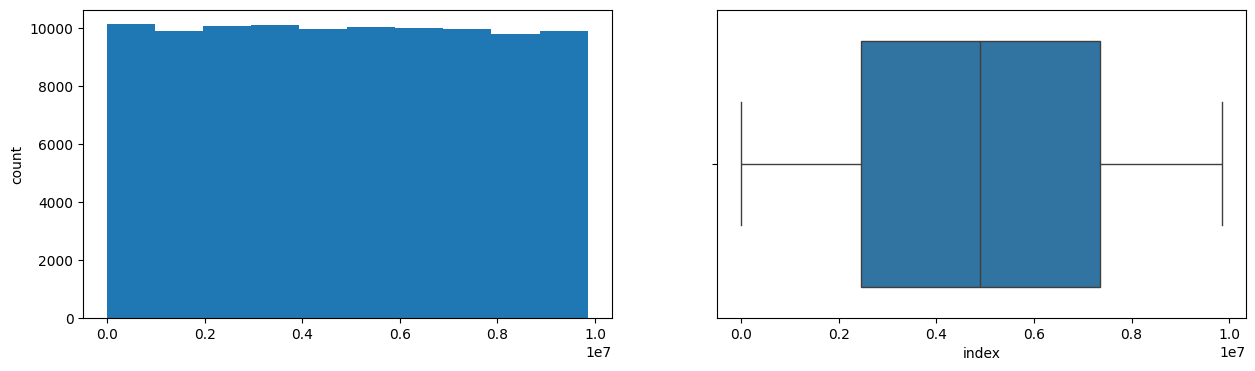

National Provider Identifier
Skew : -0.01


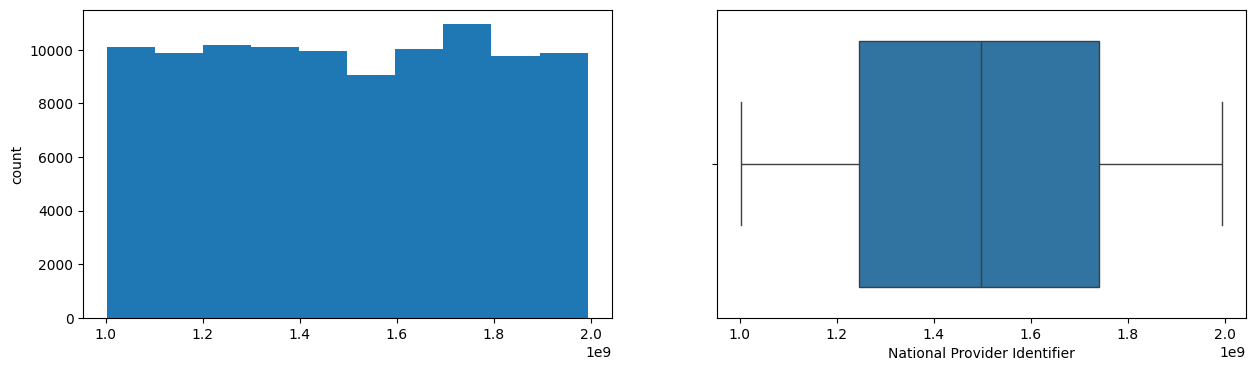

Zip Code of the Provider
Skew : 0.28


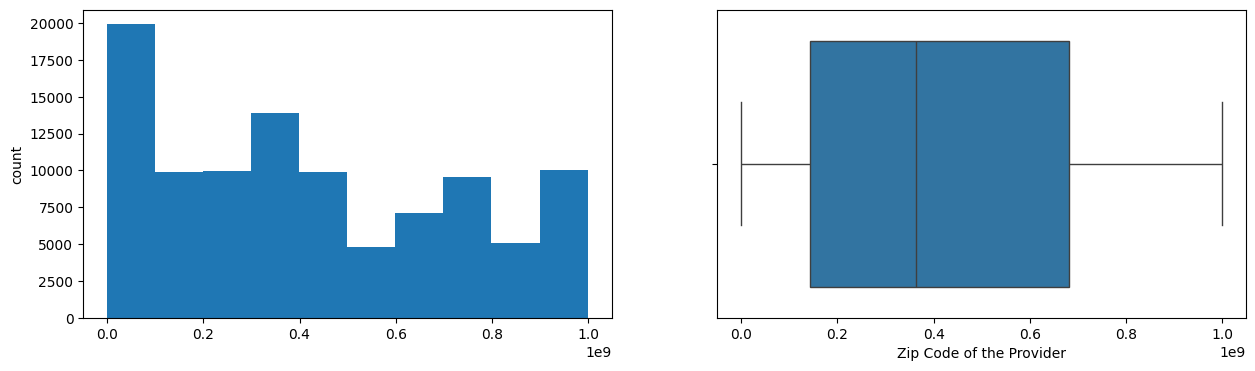

Money difference
Skew : 18.47


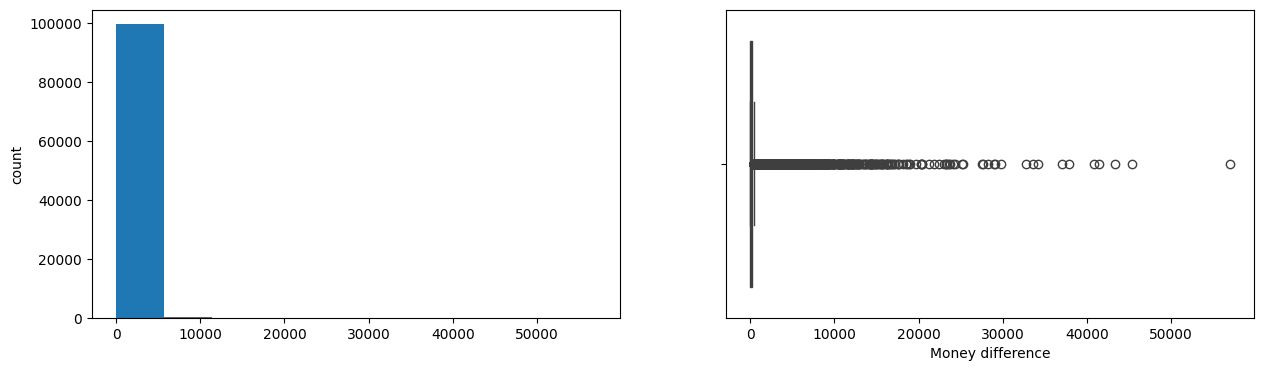

In [ ]:
for col in num_cols:
    print(col)
    print('Skew :', round(df[col].skew(), 2))
    plt.figure(figsize = (15, 4))
    plt.subplot(1, 2, 1)
    df[col].hist(grid=False)
    plt.ylabel('count')
    plt.subplot(1, 2, 2)
    sns.boxplot(x=df[col])
    plt.show()

# **USING THE SWEETVIZ LIBRARY TO GENERATE A EDA REPORT ON THE WHOLE DATASET WITH SPECIAL FOCUS ON THE MONEY DIFFERENCE COLUMN AND HOW IT IS CORRELATED TO THE OTHER COLUMNS IN THE DATASET**

In [ ]:
pip install sweetviz
import sweetviz as sv
report = sv.analyze(df, target_feat='Money difference')
report.show_html('Report.html')

The above line of code will generate a html file called "Report.html". The sweetviz library generates a eda report of the dataset provided. In the report we find out that the money difference column has the most correlation with the provider type column. This means the some specific providers are charging higher amounts of money than is actually necessary for the procedures.

We also target the sepcific Money difference feature using the sweetviz to find out what is its distribution in relation to the other features.

# **GRAPHS TO SEE THE CORRELATION BETWEEN THE MONEY DIFFERENCE COLUMN AND THE OTHER COLUMNS IN THE DATA SET THAT SHOW CORRELATION WITH IT**

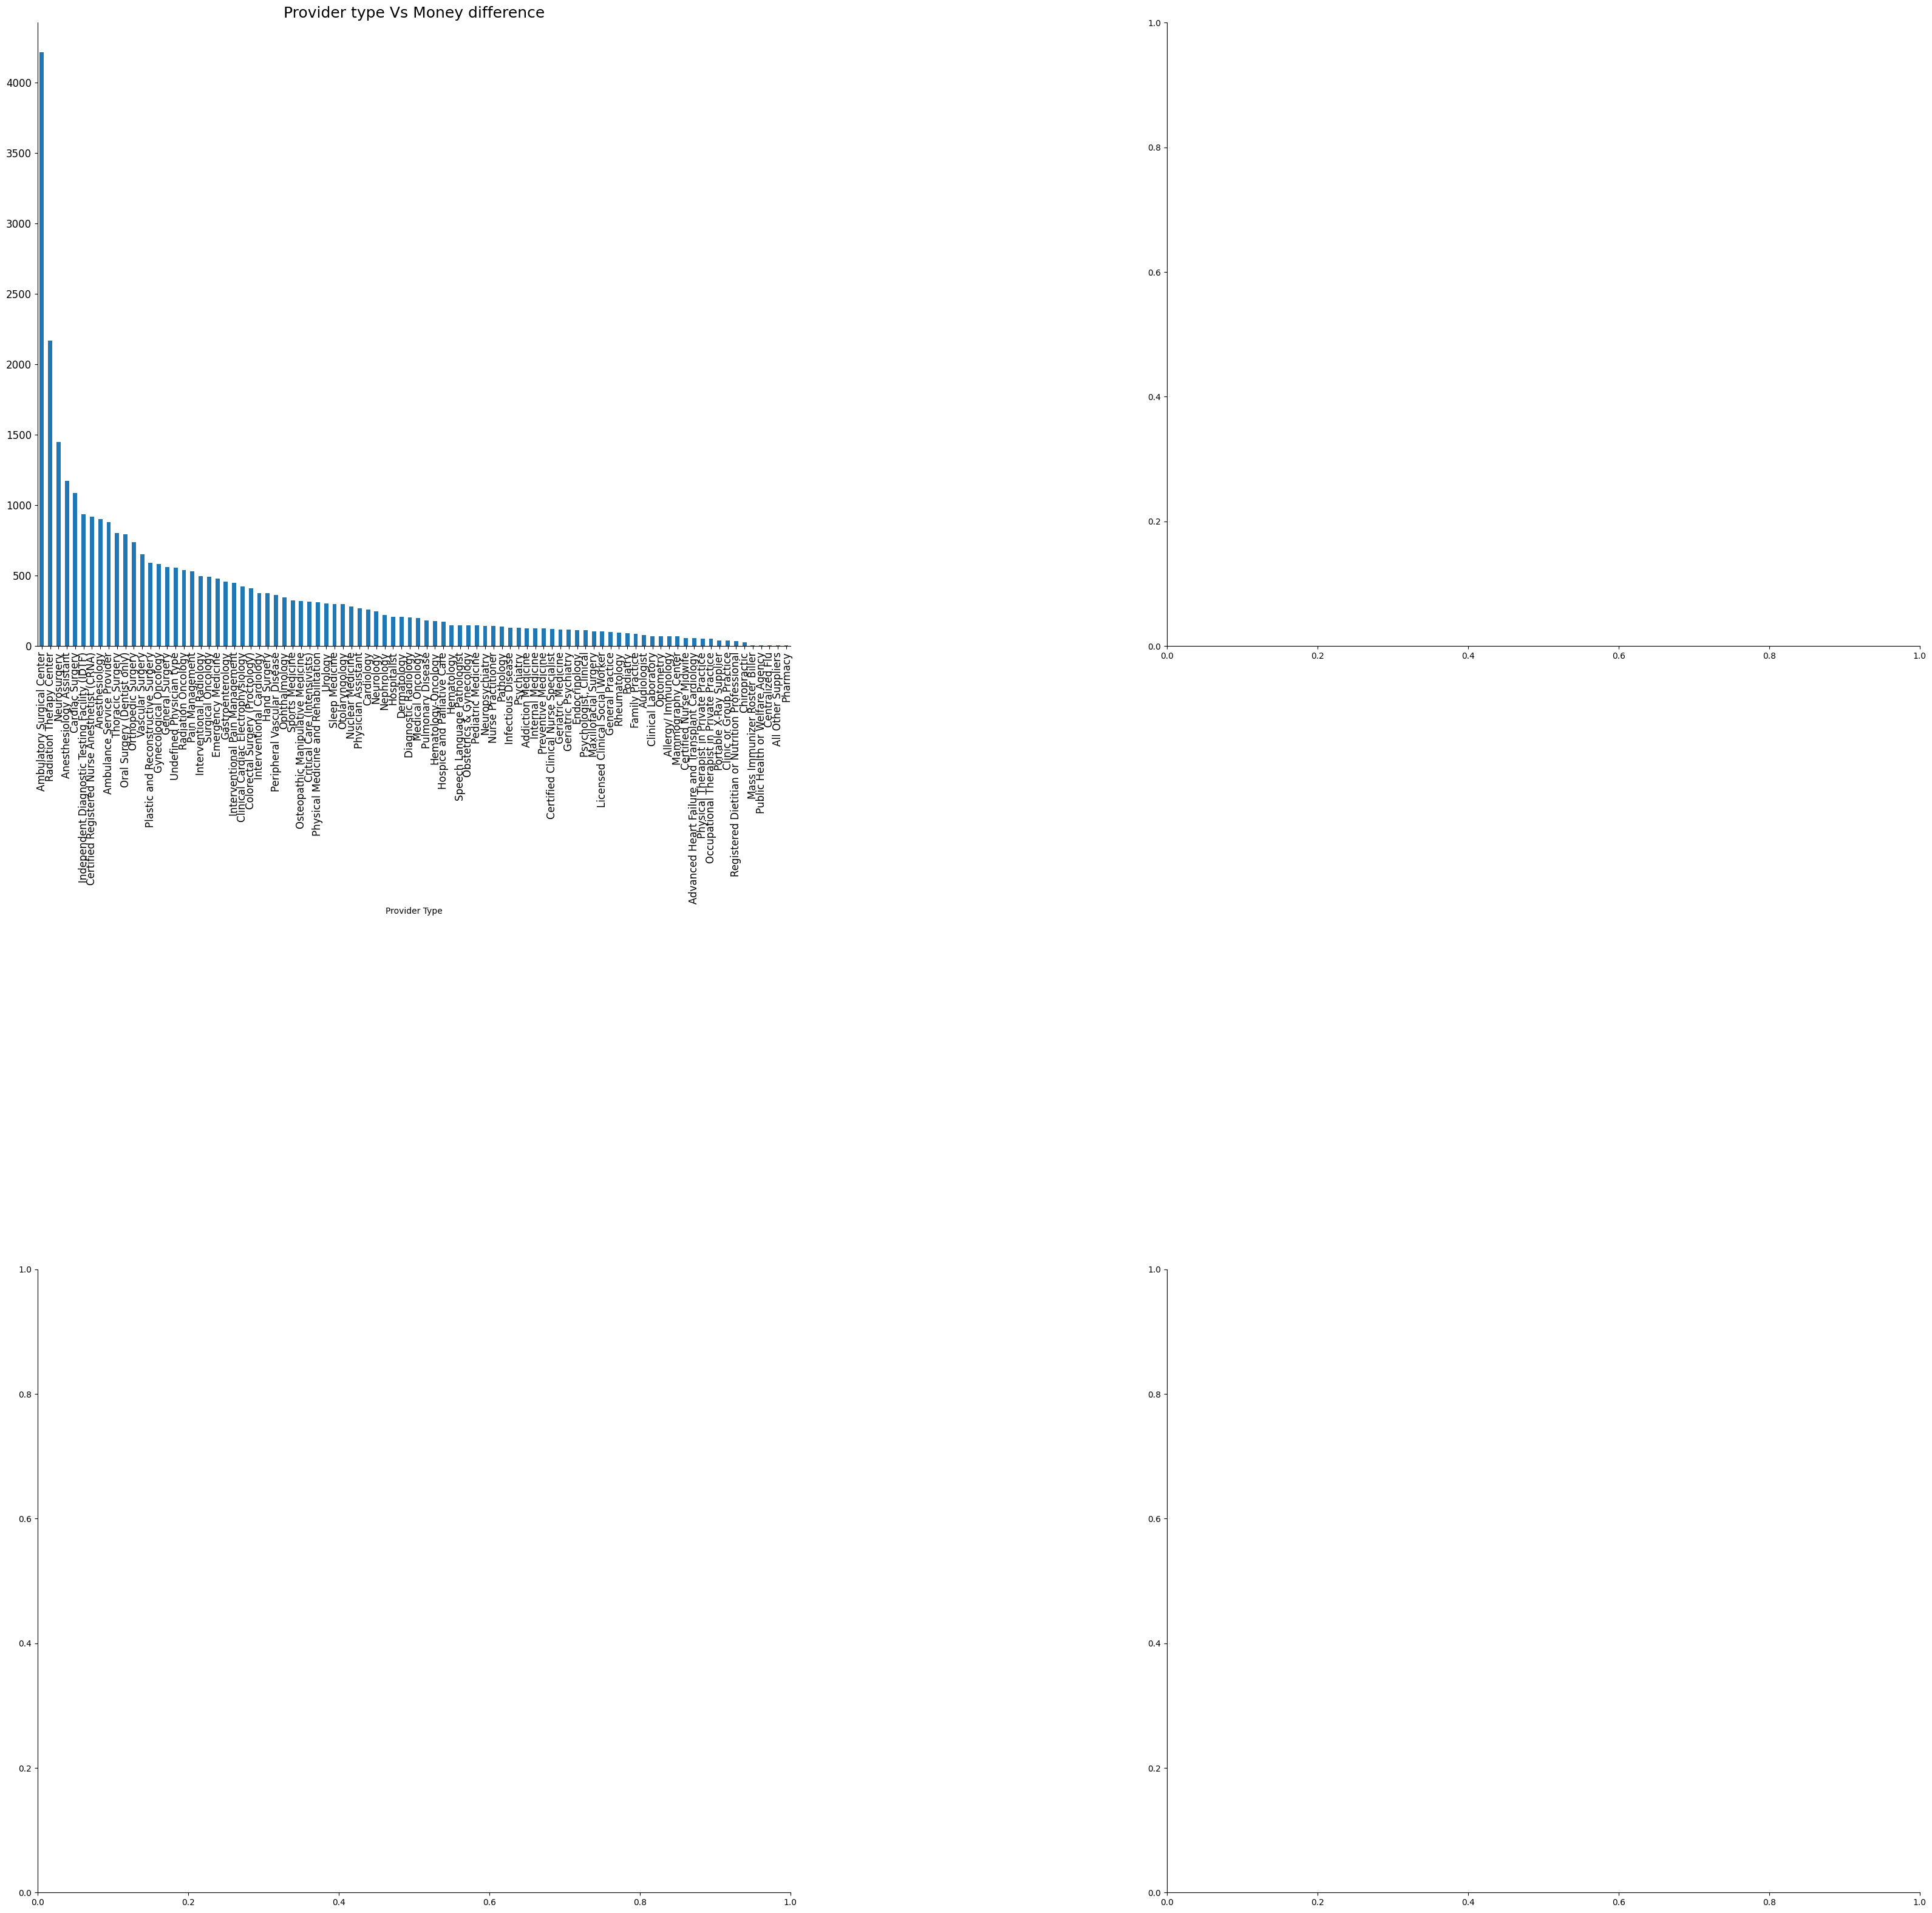

In [ ]:
fig, axarr = plt.subplots(2, 2, figsize=(40, 40))
df.groupby('Provider Type')['Money difference'].mean().sort_values(ascending=False).plot.bar(ax=axarr[0][0], fontsize=12)
axarr[0][0].set_title("Provider type Vs Money difference", fontsize=18)
plt.subplots_adjust(hspace=1.0)
plt.subplots_adjust(wspace=.5)
sns.despine()

In the above graph we see that Ambulatory Surgical Center providers has the highest difference in the money difference column. This indicates that the anomaly lies here and we should be able to identify fraudulant behaviour if we study the Ambulatory Surgical Center rows.

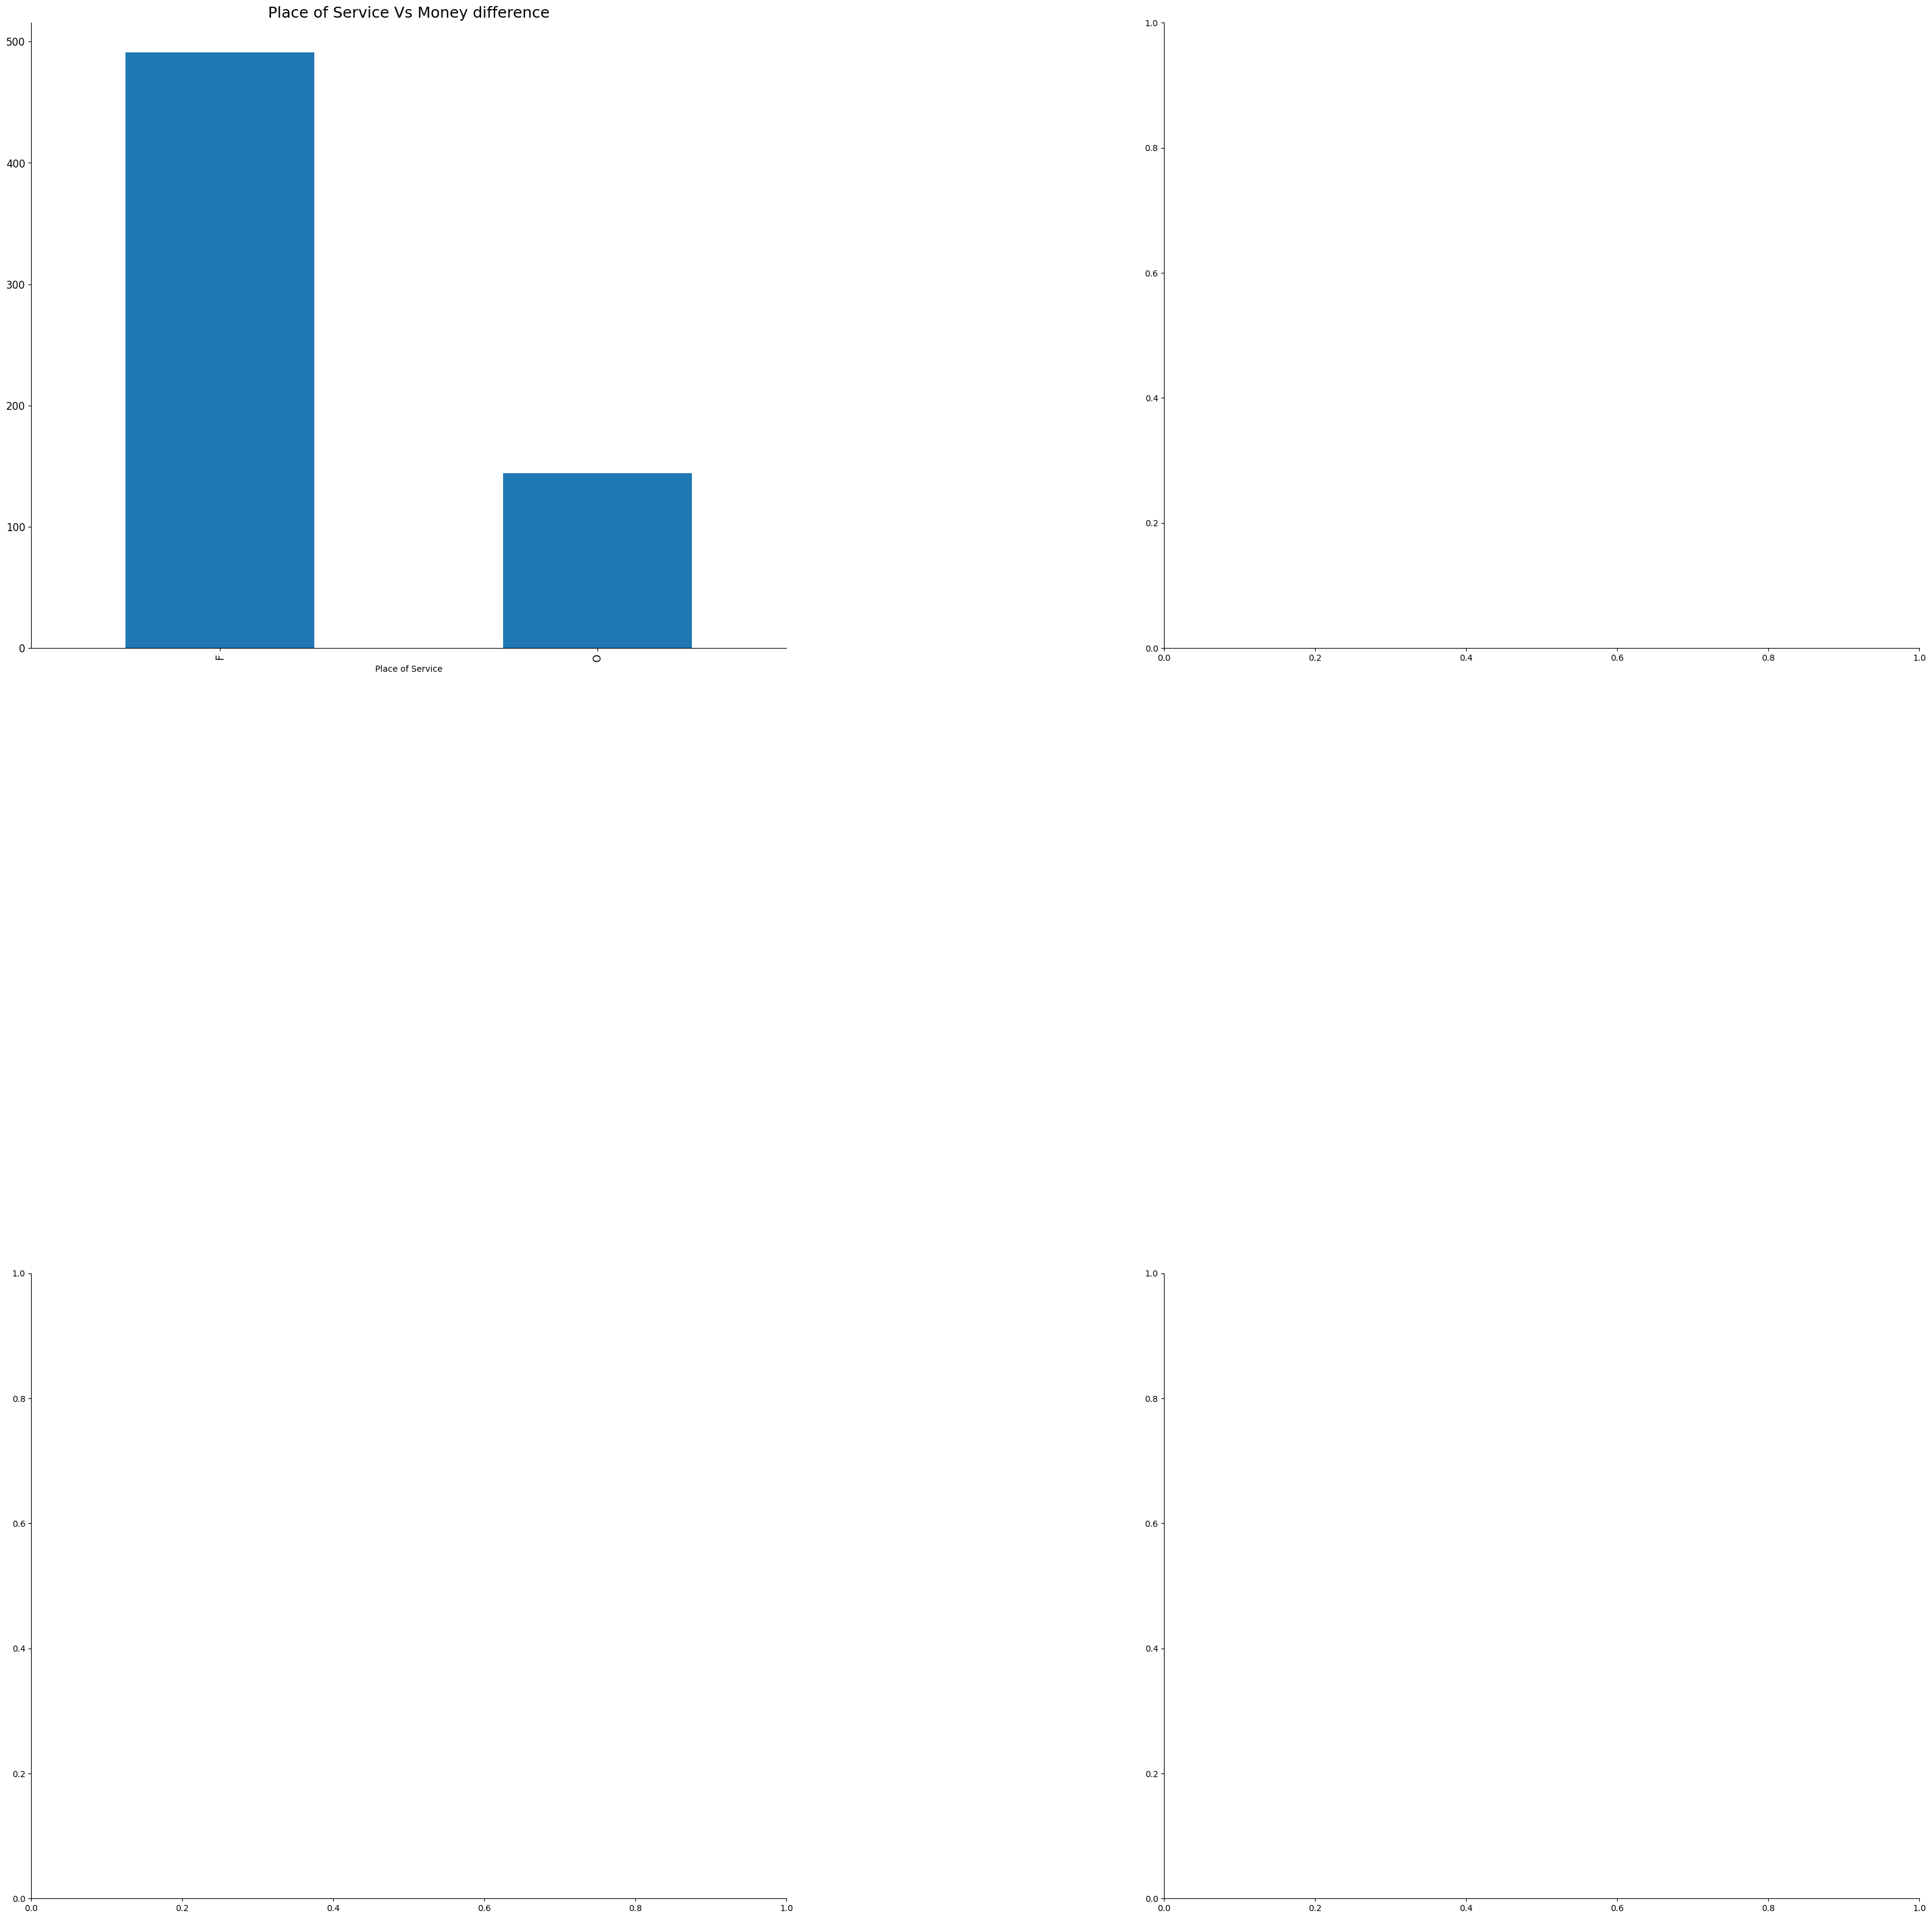

In [ ]:
fig, axarr = plt.subplots(2, 2, figsize=(40, 40))
df.groupby('Place of Service')['Money difference'].mean().sort_values(ascending=False).plot.bar(ax=axarr[0][0], fontsize=12)
axarr[0][0].set_title("Place of Service Vs Money difference", fontsize=18)
plt.subplots_adjust(hspace=1.0)
plt.subplots_adjust(wspace=.5)
sns.despine()

The above graph shows that procedures conducted in facilities have a higher money difference as compared to procedures conducted in offices.  

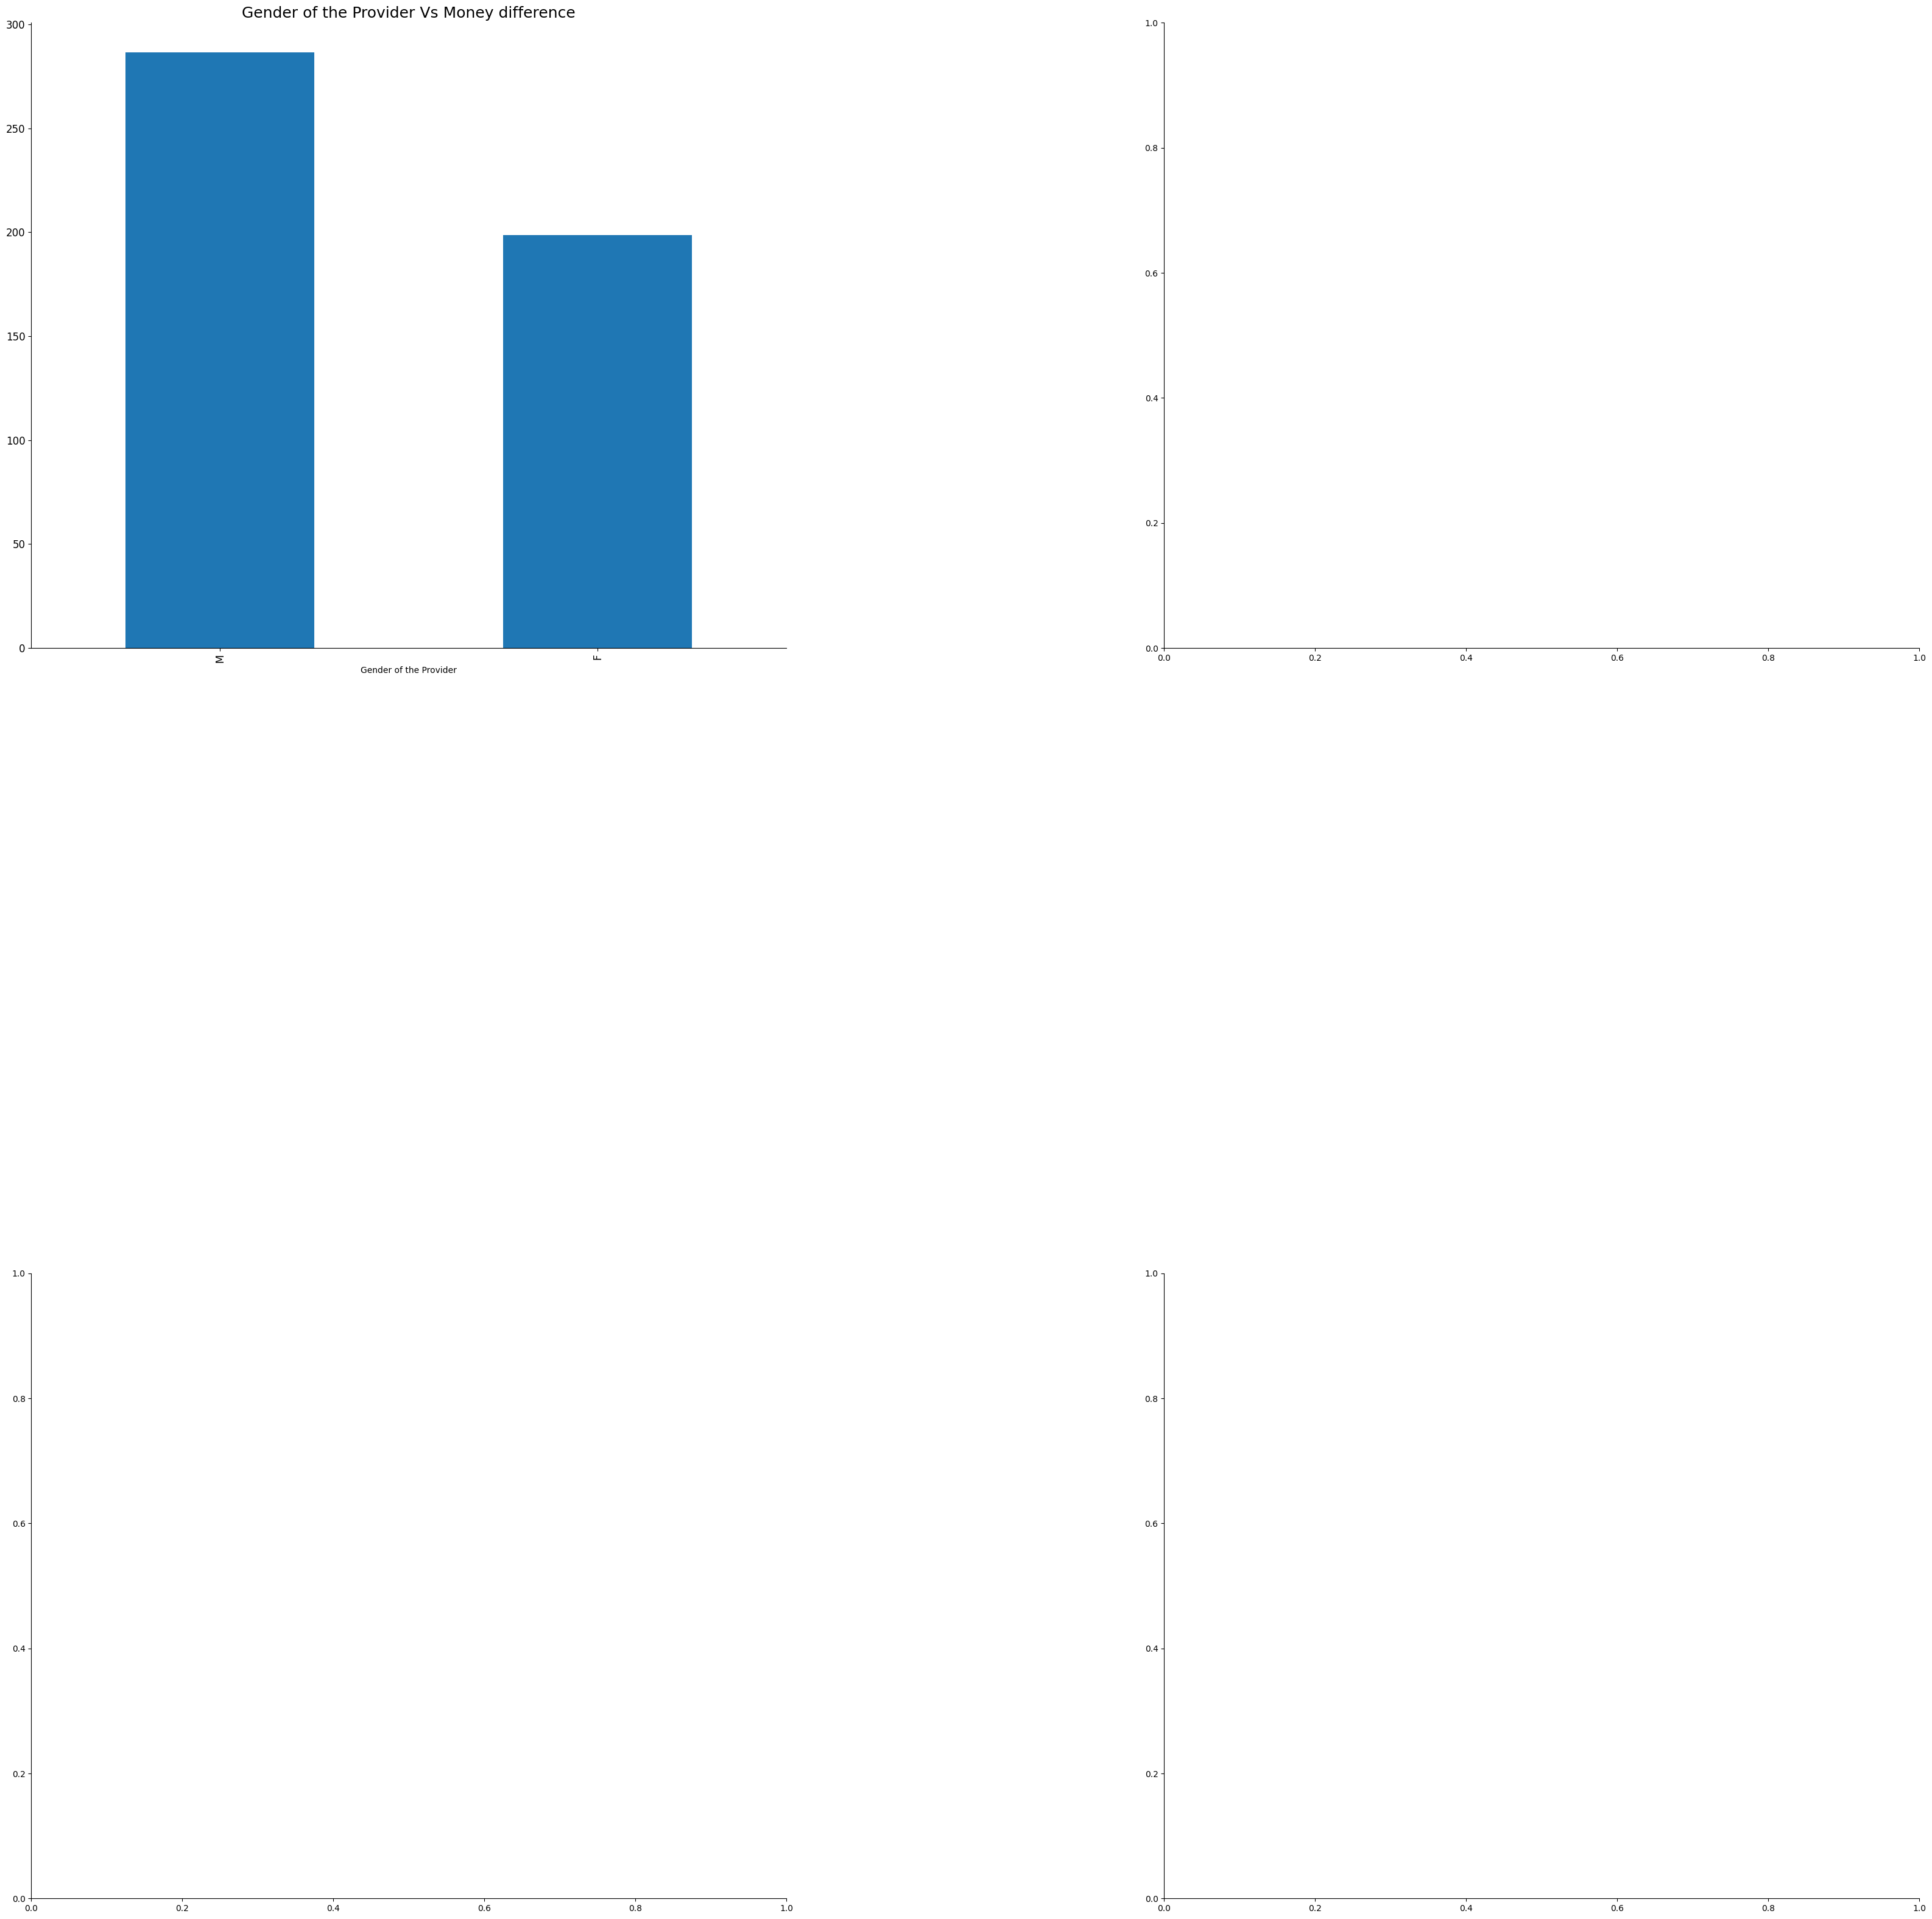

In [ ]:
fig, axarr = plt.subplots(2, 2, figsize=(40, 40))
df.groupby('Gender of the Provider')['Money difference'].mean().sort_values(ascending=False).plot.bar(ax=axarr[0][0], fontsize=12)
axarr[0][0].set_title("Gender of the Provider Vs Money difference", fontsize=18)
plt.subplots_adjust(hspace=1.0)
plt.subplots_adjust(wspace=.5)
sns.despine()

The above graph shows that procedures conducted by males have a higher money difference as compared to procedures conducted by females.  

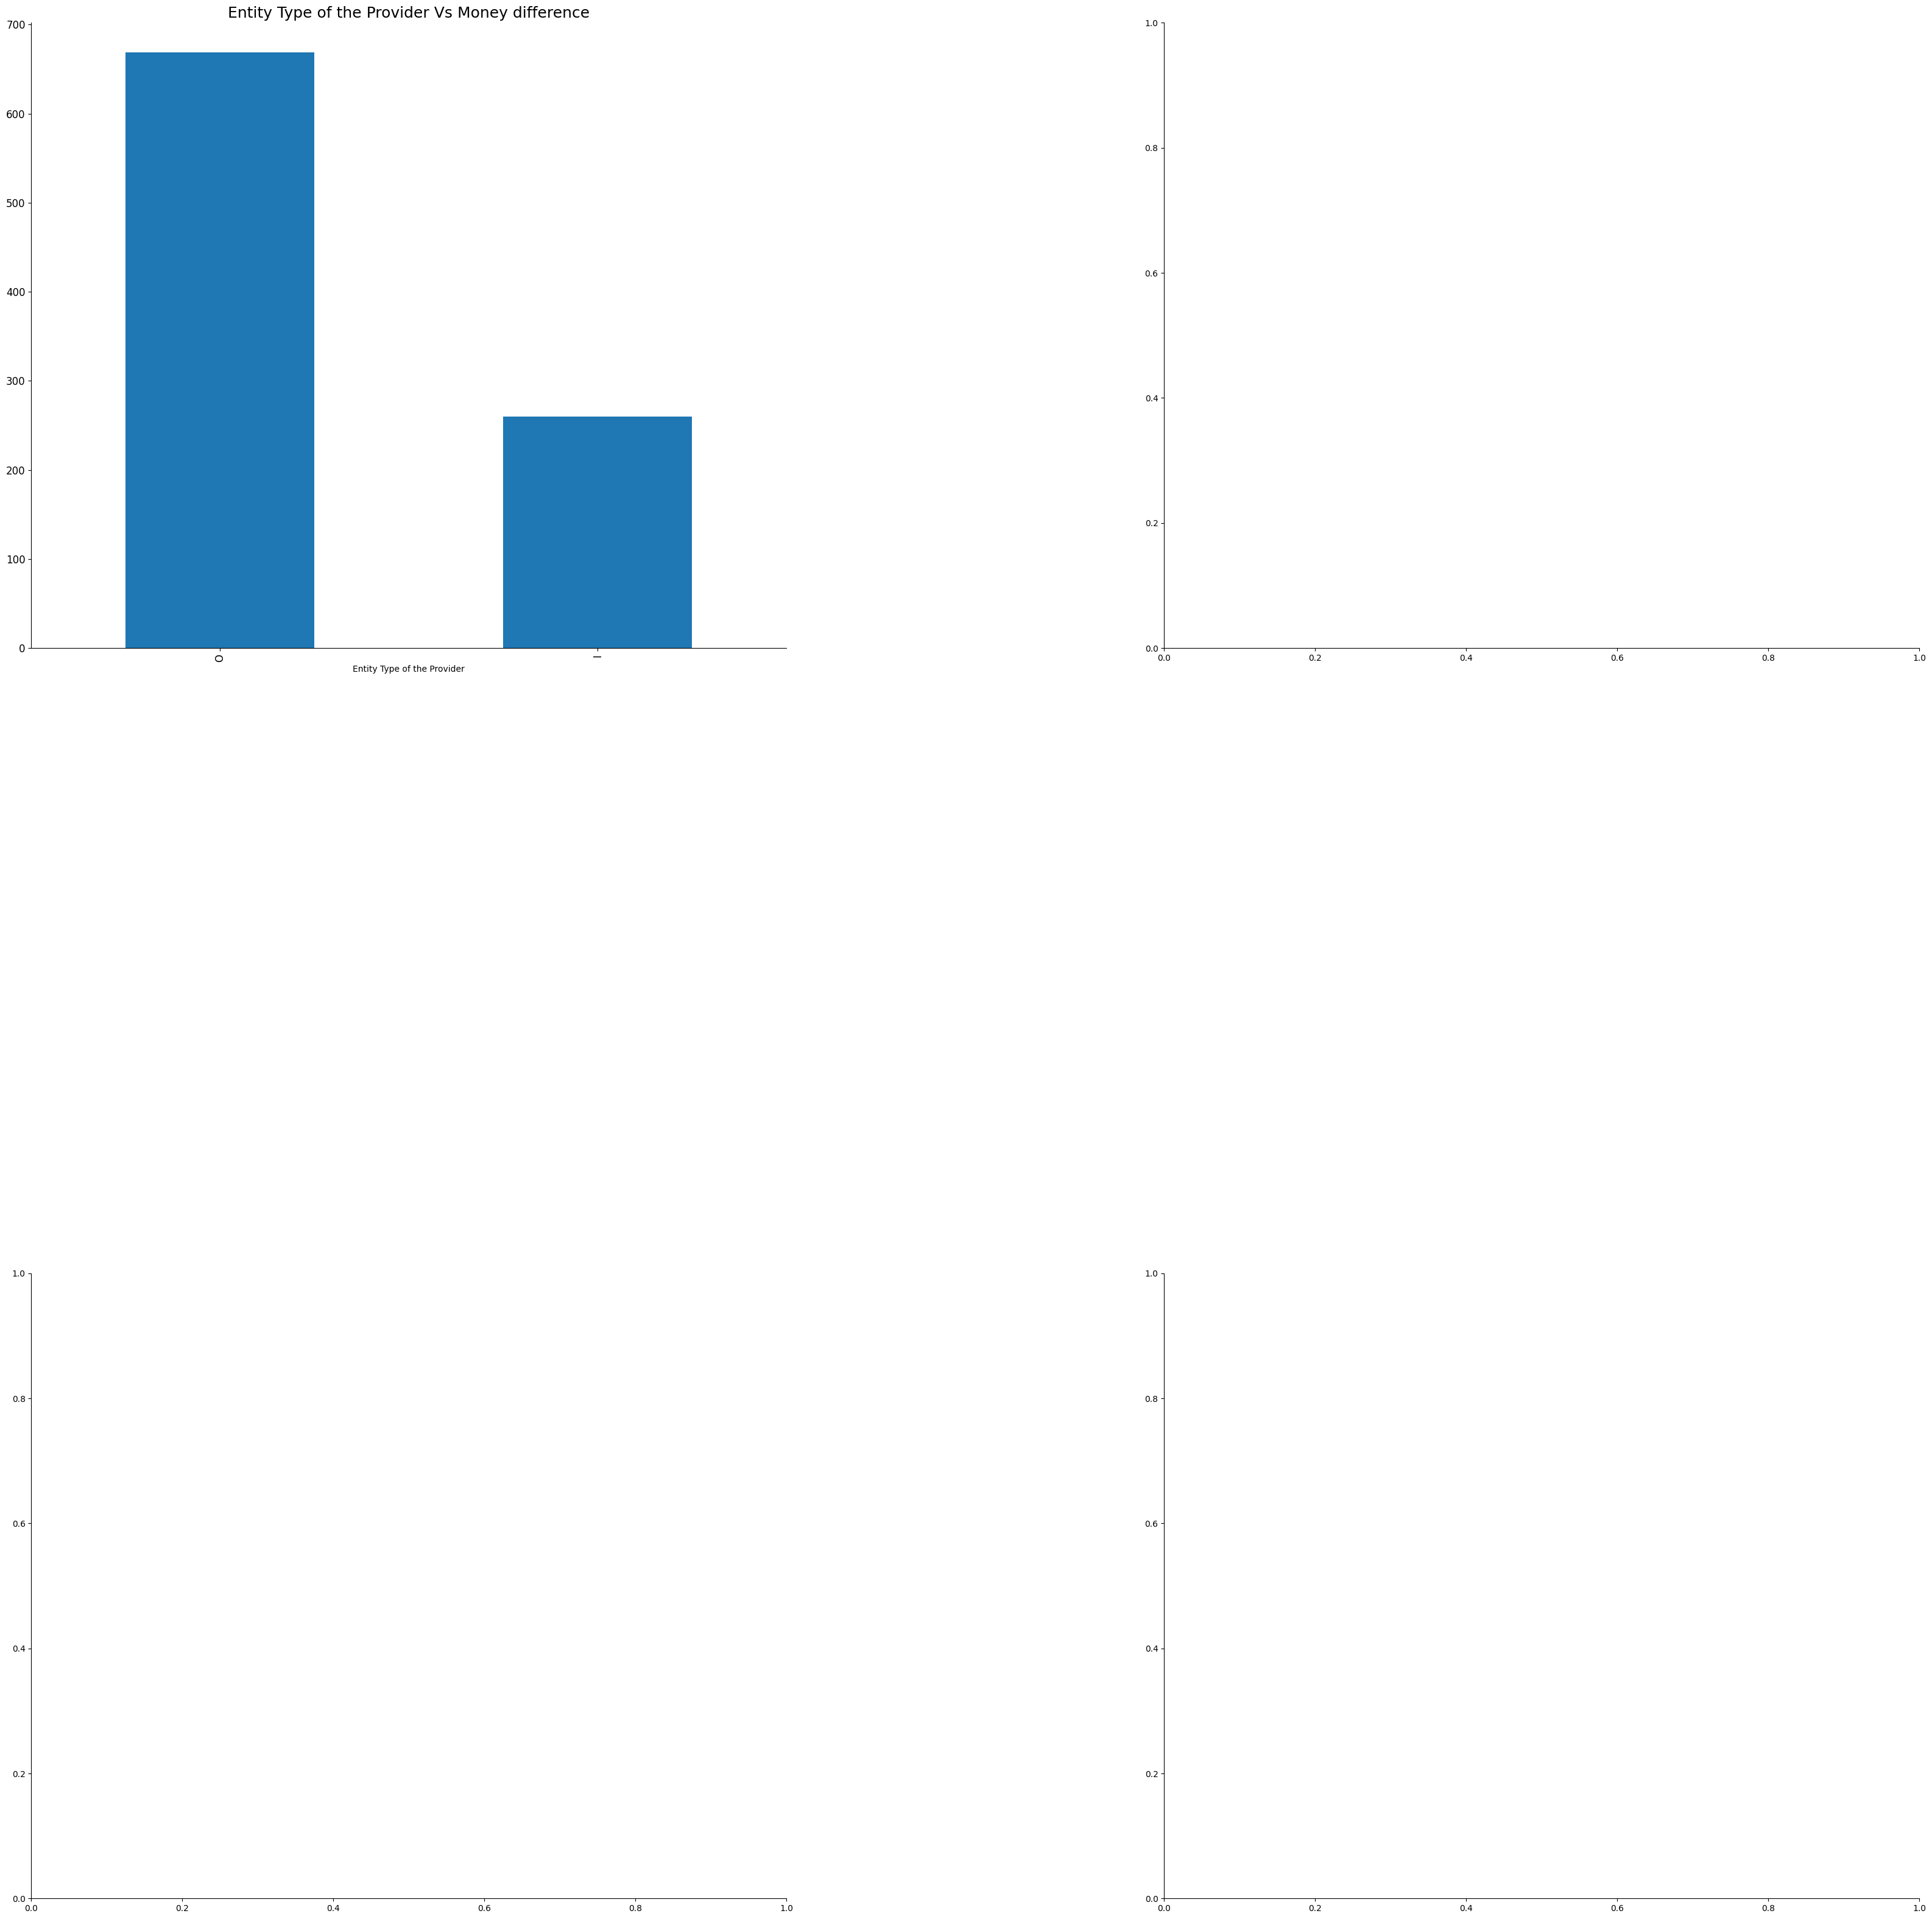

In [ ]:
fig, axarr = plt.subplots(2, 2, figsize=(40, 40))
df.groupby('Entity Type of the Provider')['Money difference'].mean().sort_values(ascending=False).plot.bar(ax=axarr[0][0], fontsize=12)
axarr[0][0].set_title("Entity Type of the Provider Vs Money difference", fontsize=18)
plt.subplots_adjust(hspace=1.0)
plt.subplots_adjust(wspace=.5)
sns.despine()

The above graph shows that procedures conducted by organizations have a higher money difference as compared to procedures conducted by individuals.  